# Task 1- Prediction Using Unsupervised Machine Learning(Optimum number Clusters)

# Submitted By: Km. Rashi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Load Dataset
data=pd.read_csv("E:\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#show columns name
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
#Check null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CCCA381488>,
      dtype=object)

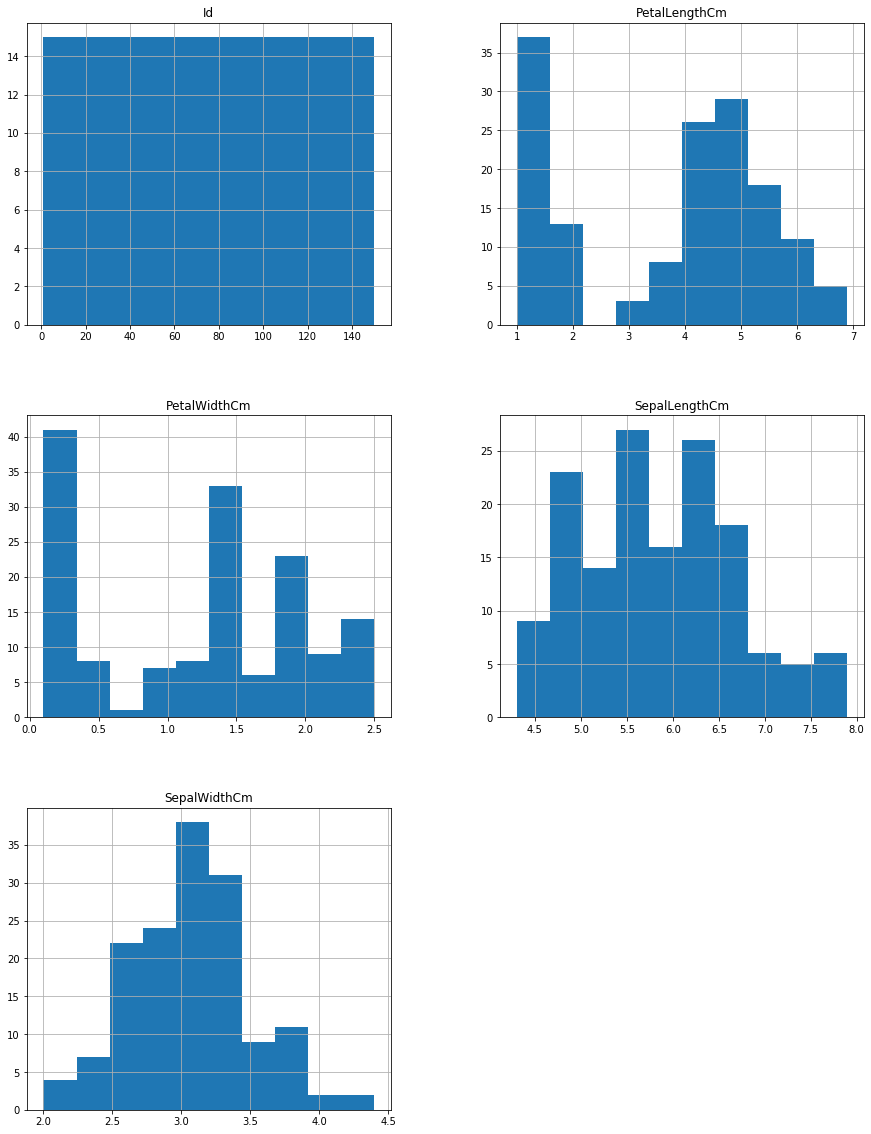

In [11]:
#Plot histogram for all columns
data.hist(figsize=(15,20))

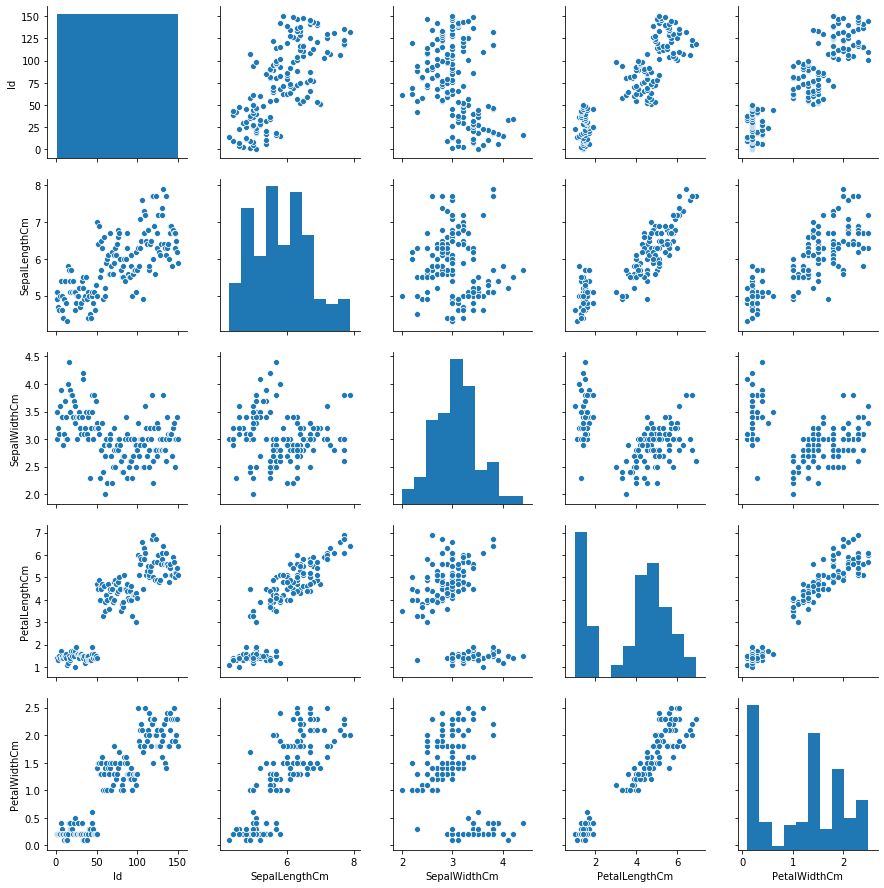

In [12]:
sns.pairplot(data)

In [13]:
#Explore Data Analysis
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Now Find the Optimum Number Of Clusters for K Means and Determine the value of K.

No handles with labels found to put in legend.


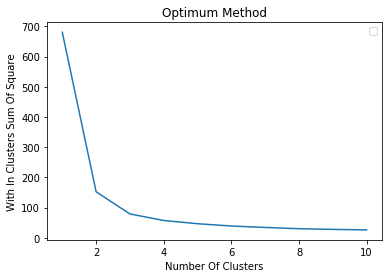

In [14]:
#Finding the optimum number of clusters for k-Means Classification
data1=data.iloc[:,[1,2,3,4]].values
from sklearn.cluster import KMeans
iner=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data1)
    iner.append(kmeans.inertia_)
    
#Plotting the result onto a line graph
plt.plot(range(1,11),iner)
plt.title('Optimum Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('With In Clusters Sum Of Square')
plt.legend()
plt.show()


In [16]:
data2=data.iloc[:,1:4].values
k=KMeans(n_clusters = 3)
km=k.fit(data2)
predict=km.predict(data2)

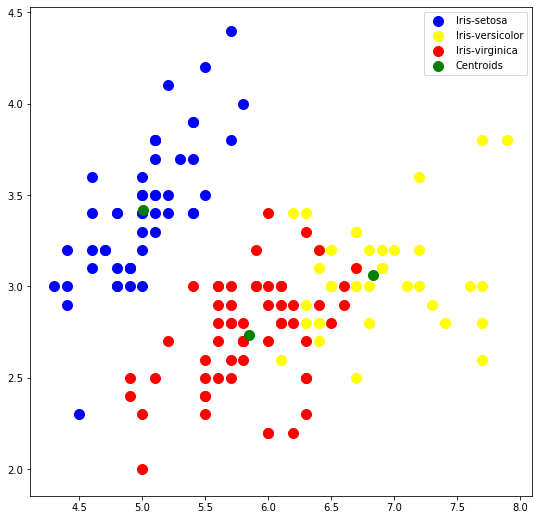

In [22]:
#Apply KMeans Clusture Method
plt.figure(figsize=(9,9))
plt.scatter(data2[predict==0,0],data2[predict==0,1],s = 100,c = 'blue',label= 'Iris-setosa')
plt.scatter(data2[predict==1,0],data2[predict==1,1],s = 100,c = 'yellow',label= 'Iris-versicolor')
plt.scatter(data2[predict==2,0],data2[predict==2,1],s = 100,c = 'red',label= 'Iris-virginica')

#Plotting the Centroids Of Cluster
plt.scatter(km.cluster_centers_[: , 0],km.cluster_centers_[:,1],
            s=100, c='green' , label= 'Centroids')
plt.legend(loc= 'upper right')
plt.show()


